In [1]:
import pandas as pd
import statsmodels.formula.api as smf
import numpy as np

In [2]:
credit_df = pd.read_csv("German Credit Data.csv")
print (credit_df.head())

print (credit_df.info())

  checkin_acc  duration credit_history  amount savings_acc present_emp_since  \
0         A11         6            A34    1169         A65               A75   
1         A12        48            A32    5951         A61               A73   
2         A14        12            A34    2096         A61               A74   
3         A11        42            A32    7882         A61               A74   
4         A11        24            A33    4870         A61               A73   

   inst_rate personal_status  residing_since  age inst_plans  num_credits  \
0          4             A93               4   67       A143            2   
1          2             A92               2   22       A143            1   
2          2             A93               3   49       A143            1   
3          2             A93               4   45       A143            1   
4          3             A93               4   53       A143            2   

    job  status  
0  A173       0  
1  A173       1  
2 

    The dataset contains 1000 records and 14 columns. 

In [3]:
credit_df.iloc[0:5, 1:7]

,duration,credit_history,amount,savings_acc,present_emp_since,inst_rate
0,6,A34,1169,A65,A75,4
1,48,A32,5951,A61,A73,2
2,12,A34,2096,A61,A74,2
3,42,A32,7882,A61,A74,2
4,24,A33,4870,A61,A73,3


In [4]:
credit_df.iloc[0:5, 8:]

,residing_since,age,inst_plans,num_credits,job,status
0,4,67,A143,2,A173,0
1,2,22,A143,1,A173,1
2,3,49,A143,1,A172,0
3,4,45,A143,1,A173,0
4,4,53,A143,2,A173,1


    As observed, there are few columns are categorical. Those need to be transformed using pd.get_dummies() later.

In [5]:
credit_df.status.value_counts()

0    700
1    300
Name: status, dtype: int64

    0: Good Credit and 1: Bad Credit as per info() information. There are more Good credit information than Bad credit.

    For  building a classification model, the status column will be used as the dependent variable, while the remaining columns will be independent variables or features. We will create a list named X_features and store the names of all independent variables for future use. 

In [6]:
X_features = list(credit_df.columns)
X_features.remove('status')
X_features

['checkin_acc',
 'duration',
 'credit_history',
 'amount',
 'savings_acc',
 'present_emp_since',
 'inst_rate',
 'personal_status',
 'residing_since',
 'age',
 'inst_plans',
 'num_credits',
 'job']

### Encoding Categorical Features
    
    There are several categorical features in the data which need to be binary encoded (using dummy variables). Also this process know as One Hot Encoding (OHE). 

In [7]:
encoded_credit_df = pd.get_dummies(credit_df[X_features], drop_first = True)

In [8]:
list(encoded_credit_df.columns)

['duration',
 'amount',
 'inst_rate',
 'residing_since',
 'age',
 'num_credits',
 'checkin_acc_A12',
 'checkin_acc_A13',
 'checkin_acc_A14',
 'credit_history_A31',
 'credit_history_A32',
 'credit_history_A33',
 'credit_history_A34',
 'savings_acc_A62',
 'savings_acc_A63',
 'savings_acc_A64',
 'savings_acc_A65',
 'present_emp_since_A72',
 'present_emp_since_A73',
 'present_emp_since_A74',
 'present_emp_since_A75',
 'personal_status_A92',
 'personal_status_A93',
 'personal_status_A94',
 'inst_plans_A142',
 'inst_plans_A143',
 'job_A172',
 'job_A173',
 'job_A174']

    For example, checkin_acc variable is encoded into the following three dummy variables and the base category. 
    
    checkin_acc_A11 is dropped. If all the following three variables value are set to 0, it indicates that the account type is checkin_acc_A11.

In [9]:
encoded_credit_df[['checkin_acc_A12', 'checkin_acc_A13', 'checkin_acc_A14']].head()

,checkin_acc_A12,checkin_acc_A13,checkin_acc_A14
0,0,0,0
1,1,0,0
2,0,0,1
3,0,0,0
4,0,0,0


    The first record has all the dummy variable values set to 0, indicating it is checkin account type checkin_acc_A11, which is the base category.  The account type in second observation is checkin_acc_A12 and so on. 

In [10]:
import statsmodels.api as sm


Y = credit_df.status
X = sm.add_constant(encoded_credit_df)

H:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


### Splitting Dataset into Training and Test sets

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

### Building Logistic Regression Model


In [12]:
logit = sm.Logit(y_train, X_train)

logit_model = logit.fit()

Optimization terminated successfully.
         Current function value: 0.488938
         Iterations 6


In [13]:
logit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 status   No. Observations:                  700
Model:                          Logit   Df Residuals:                      670
Method:                           MLE   Df Model:                           29
Date:                Tue, 23 Jun 2020   Pseudo R-squ.:                  0.1980
Time:                        08:11:30   Log-Likelihood:                -342.26
converged:                       True   LL-Null:                       -426.75
                                        LLR p-value:                 1.063e-21
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.1511      1.135     -0.133      0.894      -2.375       2.073
duration                  0.0206      0.010      1.993      0.046       0.000       0.041
amount                    0.0001   4.65e-05      2.377      0.017    1.93e-05       0.000
inst_rate                 0.3064      0.099      3.108      0.002       0.113       0.500
residing_since            0.0967      0.092      1.051      0.293      -0.084       0.277
age                      -0.0227      0.010     -2.213      0.027      -0.043      -0.003
num_credits               0.2854      0.214      1.334      0.182      -0.134       0.705
checkin_acc_A12          -0.4126      0.239     -1.726      0.084      -0.881       0.056
checkin_acc_A13          -0.9053      0.434     -2.087      0.037      -1.756      -0.055
checkin_acc_A14          -1.6052      0.259     -6.207      0.000      -2.112      -1.098
credit_history_A31        0.1532      0.580      0.264      0.792      -0.983       1.289
credit_history_A32       -0.4960      0.441     -1.124      0.261      -1.360       0.369
credit_history_A33       -0.8881      0.502     -1.768      0.077      -1.872       0.096
credit_history_A34       -1.4124      0.453     -3.119      0.002      -2.300      -0.525
savings_acc_A62          -0.0496      0.321     -0.155      0.877      -0.678       0.579
savings_acc_A63          -0.6640      0.482     -1.378      0.168      -1.608       0.280
savings_acc_A64          -1.1099      0.602     -1.844      0.065      -2.290       0.070
savings_acc_A65          -0.6061      0.275     -2.208      0.027      -1.144      -0.068
present_emp_since_A72     0.0855      0.472      0.181      0.856      -0.840       1.011
present_emp_since_A73    -0.0339      0.449     -0.075      0.940      -0.914       0.846
present_emp_since_A74    -0.3789      0.479     -0.791      0.429      -1.318       0.560
present_emp_since_A75    -0.2605      0.455     -0.572      0.567      -1.153       0.632
personal_status_A92      -0.0069      0.484     -0.014      0.989      -0.956       0.942
personal_status_A93      -0.4426      0.476     -0.929      0.353      -1.376       0.491
personal_status_A94      -0.3080      0.555     -0.555      0.579      -1.397       0.781
inst_plans_A142          -0.2976      0.516     -0.577      0.564      -1.308       0.713
inst_plans_A143          -0.4458      0.277     -1.609      0.108      -0.989       0.097
job_A172                 -0.0955      0.768     -0.124      0.901      -1.601       1.410
job_A173                 -0.0198      0.738     -0.027      0.979      -1.466       1.426
job_A174                 -0.0428      0.737     -0.058      0.954      -1.488       1.402
=========================================================================================
"""

### Model Diagnostics

    It is important to validate the logistic regression modelto ensure its validity and goodness of fit before it can be used for practical applications. The following measures are used to validate a logistic regression model. 
    
    1. Wald's test (is a Chi-square test) for checking the staticical significant of individual predictor variables. This is equivalent to t-test in the MLR (multiple linear regression) model. 
    
    2. Likelihood ratio test for checking the statistical significance of the overall model (LLR p-value is reported in the output). Likelihood ratio test is also used for variable selection.
    
    3. Pseudo R-square: it is a measure of goodness of the model. It is called pseudo R-square it does not have the same interpretation of R-square as in the MLR model.
    
    

    The model summary suggests that as per Wald's test, only 8 features are statistically significant at 0.05 level of significant. as p-values are less than 0.05, p-value for likelihood ratio test (almost 0.00) indicates that the overall model is statistically significant. 
    
    

In [14]:
def get_significant_vars( lm ):
    var_p_vals_df = pd.DataFrame( lm.pvalues )
    var_p_vals_df['vars'] = var_p_vals_df.index
    var_p_vals_df.columns = ['pvals', 'vars']
    return list( var_p_vals_df[var_p_vals_df.pvals <= 0.05]['vars'])

In [15]:
significant_vars = get_significant_vars( logit_model ) 
significant_vars

['duration',
 'amount',
 'inst_rate',
 'age',
 'checkin_acc_A13',
 'checkin_acc_A14',
 'credit_history_A34',
 'savings_acc_A65']

In [16]:
final_logit = sm.Logit( y_train, sm.add_constant( X_train[significant_vars] ) ).fit() 

Optimization terminated successfully.
         Current function value: 0.511350
         Iterations 6


H:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [17]:
final_logit.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:               Logit            Pseudo R-squared: 0.161     
Dependent Variable:  status           AIC:              733.8898  
Date:                2020-06-23 08:11 BIC:              774.8495  
No. Observations:    700              Log-Likelihood:   -357.94   
Df Model:            8                LL-Null:          -426.75   
Df Residuals:        691              LLR p-value:      7.4185e-26
Converged:           1.0000           Scale:            1.0000    
No. Iterations:      6.0000                                       
------------------------------------------------------------------
                    Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------
const              -0.8969   0.4364 -2.0551 0.0399 -1.7523 -0.0415
duration            0.0197   0.0098  2.0033 0.0451  0.0004  0.0390
amount              0.0001   0.0000  2.3205 0.0203  0.0000  0.0002
inst_rate           0.2811   0.0929  3.0264 0.0025  0.0991  0.4632
age                -0.0216   0.0089 -2.4207 0.0155 -0.0392 -0.0041
checkin_acc_A13    -0.8038   0.4081 -1.9697 0.0489 -1.6037 -0.0040
checkin_acc_A14    -1.5452   0.2187 -7.0649 0.0000 -1.9738 -1.1165
credit_history_A34 -0.8781   0.2319 -3.7858 0.0002 -1.3327 -0.4235
savings_acc_A65    -0.5448   0.2581 -2.1108 0.0348 -1.0507 -0.0389
==================================================================

"""

In [18]:
final_logit.predict()

array([0.12491651, 0.14893061, 0.48388335, 0.12999817, 0.14728162,
       0.15091   , 0.57915508, 0.40150258, 0.52777751, 0.05889065,
       0.35928155, 0.54575075, 0.11753399, 0.55234598, 0.09810212,
       0.20689565, 0.18642782, 0.03052611, 0.62653351, 0.40785643,
       0.53774518, 0.42349499, 0.10003751, 0.14731482, 0.59404289,
       0.09347537, 0.3795748 , 0.36478559, 0.42655559, 0.14329295,
       0.54331958, 0.29889839, 0.51586186, 0.02810455, 0.08207986,
       0.2989718 , 0.73260816, 0.1586864 , 0.35288899, 0.13905618,
       0.46358494, 0.35142665, 0.47086615, 0.29771828, 0.04657916,
       0.15330644, 0.5674739 , 0.09125177, 0.0426326 , 0.04055503,
       0.53908136, 0.59865996, 0.2245237 , 0.1881536 , 0.59790204,
       0.72626082, 0.04122059, 0.23181359, 0.02749225, 0.11323186,
       0.18458508, 0.24527597, 0.03892068, 0.16643914, 0.21433628,
       0.39699038, 0.06703786, 0.10106142, 0.21813996, 0.07479413,
       0.34048252, 0.10831464, 0.17710115, 0.45207562, 0.11934

    IMP: The negative sign in coefficient value indicates that as the value of this variable increases, the probability of being Bad Credit decreases, that is P(Y = 1) decreases. A positive sign means that the probability being bad credit increases as the corresponding value of the variable increases. 
    
    1. The log odds ratio of Bad Credit increases as duration, amount and inst_rate increases. For example, one unit change in duration results in 0.019 unit change in log odd ratio.
    
    2. The probability of being a bad credit descreses as age increases. This means that oder people tend to pay back their credits ontime compared to younger people.

### Predicting on Test Data

In [19]:
y_pred_df = pd.DataFrame( { "actual": y_test, 
                           "predicted_prob": final_logit.predict(sm.add_constant( X_test[significant_vars]) ) } )

In [20]:
y_pred_df.sample(10, random_state = 42) 

,actual,predicted_prob
557,1,0.080493
798,0,0.076653
977,0,0.345979
136,0,0.249919
575,0,0.062264
544,0,0.040768
332,1,0.833093
917,1,0.370667
678,0,0.388392
363,0,0.088952


    To understand how many observations the model has classified correctly and how many it has not, as cut-off probability needs to be assumed. Assume that the cut-off probability is 0.5 (in most cases); then all observations with predicted probability of more than 0.5 will be predicted as bad credits and rest of all as good credits. We will explore tehniques on how to find the optimal cut-off probability later. For now assume 0.5 is our cut-off probability value.
    
    Iterate through predicted probabiilty of each observation using map() and tag the observation as bad credit(1) if probability value is more than 0.5 or as good credit (0) otherwise.

In [21]:
y_pred_df['predicted'] = y_pred_df.predicted_prob.map( lambda x: 1 if x > 0.5 else 0) 
y_pred_df.sample(10, random_state = 42) 

,actual,predicted_prob,predicted
557,1,0.080493,0
798,0,0.076653,0
977,0,0.345979,0
136,0,0.249919,0
575,0,0.062264,0
544,0,0.040768,0
332,1,0.833093,1
917,1,0.370667,0
678,0,0.388392,0
363,0,0.088952,0


In [33]:
y_pred_df.shape

(300, 3)

    It can be noticed from "actual" and "predicted" columns that some classifications are correct and some are wrong. For better understanding of this confusion, we can build a confusion matrix.

### Creating a Confusion Matrix
    
    Confusion Matrix (aka Error Matrix or Classification table) is a matrix formed by checking the actual values and predicted values of observations in the dataset. To create a confusion matrix, first import matplotlib.pyplot and seaborn to render plots.

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [23]:
from sklearn import metrics
def draw_cm( actual, predicted ):
    cm = metrics.confusion_matrix( actual, predicted, [1,0] )    
    sns.heatmap(cm, annot=True,  fmt='.2f',  xticklabels = ["Bad credit", "Good Credit"] , 
               yticklabels = ["Bad credit", "Good Credit"] )    
    plt.ylabel('True label')    
    plt.xlabel('Predicted label')    
    plt.show() 

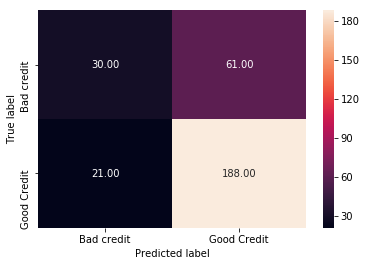

In [24]:
draw_cm( y_pred_df.actual, y_pred_df.predicted )

    The columns represents the predicted label(class), while the rows represents the actual label(class). For example, Out of 91 (30 + 61) bad credits, only 30 have been classified correctly as bad credits and rest 61 have been classified as good credits when the cut-off probability is 0.5. In other words, 
    
    1. Top-left : True Positives (TP) : Predicted Positives are actually (really) positive.
    2. Top-right: False Positives (FP): Predicted positives are actually Negative
    3. Bottom-left: False Negatives (FN): Predicted Negatives are actually Positive
    4. Bottom-right: True Negatives (TN): Predicted Negatives are actually negative.

### Measuring Accuracies:

    In classification, the model performance is often measure using concepts such as Sensitivity, Specificity, Precision and F-Score. The ability of the model to correctly classify positives and negatives is called Sensitivity (aka Recall or true positive rate) and Specificity (aka True negative rate) respectively. 

#### Sensitivity or Recall or True Positive Rate:

    Sensitivity is the conditional probability that the "predicted class is positive given that the actual class is positive". 
    
$$\large Sensitivity \space = \space \frac {TP} {TP \space + \space FN}$$    

#### Specificity (True Negative Rate):

    Specificity is the conditional probability that the "predicted class is negative given that the actual class is negative". 
    
$$\large Specificity \space = \space \frac {TN} {TN \space + \space FP}$$  

#### Precision

    Precision is the conditional probability that the "actual value is positive given that the prediction by model is positive". 
    
$$\large Precision \space = \space \frac {TP} {TP \space + \space FP}$$  

#### F-Score

    F-Score is a meaure that combines precision and recall (Harmonic mean between precision and recall). 
    
$$\large  F-Score \space = \space \frac {2 * Recall * Precision} {Recall \space + \space Precision}$$  

In [25]:
print( metrics.classification_report( y_pred_df.actual, y_pred_df.predicted ) ) 

              precision    recall  f1-score   support

           0       0.76      0.90      0.82       209
           1       0.59      0.33      0.42        91

   micro avg       0.73      0.73      0.73       300
   macro avg       0.67      0.61      0.62       300
weighted avg       0.70      0.73      0.70       300



    The model is very good at identifying the good credits (Y=0), but not very good at identifying bad credits. This is the result for cut-off probability of 0.5%. This can be improved by choosing the right cut-off probability. 

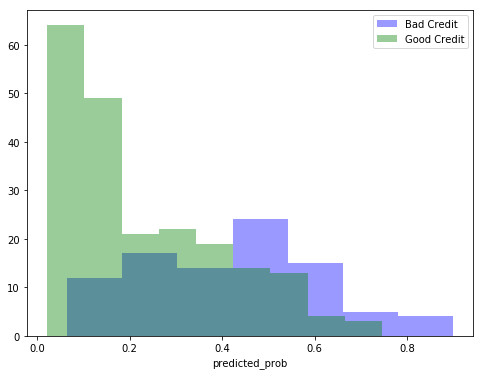

In [26]:
plt.figure( figsize = (8,6) )
sns.distplot( y_pred_df[y_pred_df.actual == 1]["predicted_prob"], 
            kde=False, color = 'b', label = 'Bad Credit' ) 
sns.distplot( y_pred_df[y_pred_df.actual == 0]["predicted_prob"], 
            kde=False, color = 'g', label = 'Good Credit' )
plt.legend() 
plt.show()

### Receiver Operating Characteristic (ROC) and Area Under Curve (AUC)

    The Receiver Operating Characteristic (ROC) curve can be used to understand the overall performance (worth) of a logistic regression model and also used for model selection. 
    
    ROC curve is a plot between sensitivity (true positive rate) on the vertical axis and 1-specificity (false positive rate) on the horizontal axis. 

In [27]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs)
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(8, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')    
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()
    return fpr, tpr, thresholds

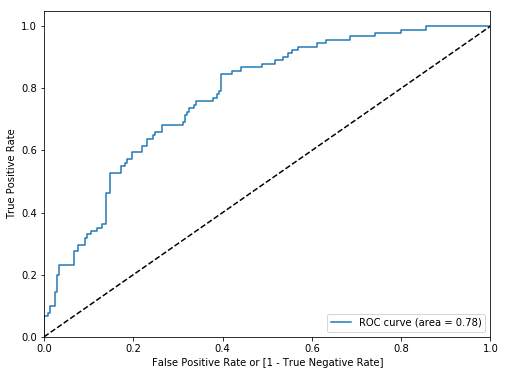

In [28]:
fpr, tpr, thresholds = draw_roc( y_pred_df.actual, y_pred_df.predicted_prob)

    The diagonal line represents the case of not using a model (no discrimination between positive and negative). The area below the diagonal line is equal to 0.5 ( it is a right-angle triangle). Sensitivity and Specificity are likely to change when the cut-off probability is changed. The line above the diagonal capture how sensitivity and 1 - specificity change when the cut-off probability is changed. Model with higher AUC is preferred and AUC is frequently used for model selection. 
    
    As a thumb rule, AUC of at least 0.7 is required for practical applicaiton of the model. AUC greater than 0.9 implies an outstanding model. Caution should be exercised while selecting model based on AUC, especially when the data is imbalanced (i.e. dataset which has less than 10% positives). In case of imbalanced datasets, the AUC may be very high (greater than 0.9), how ever wither sensitivity or specificity values may be poor. 
    
    For this example, the AUC is 0.78 which implies the model is fairly good. The AUC can also be obtained seperately. 

In [29]:
auc_score = metrics.roc_auc_score( y_pred_df.actual, y_pred_df.predicted_prob) 
round( float( auc_score ), 2 )

0.78

### Finding Optimal Classification Cut-Off:

    While using logistic regression model, one of the decisions that a data scientist has to make is to choose the right classification cut-off probability (P). The overall accuracy, sensitivity and specificity will depend on the chose cut-off probability. The following two method s are used for selecting the cut-off probability. 
    
    1. Youden's Index
    2. Cost-based Approach. 

### Youden's Index:

    Sensitivity and Specificity change when we change the cut-off probability. Youden's Index is a classification cut-off probability for which the function is maximinzed (J-Statistics)
    
    We already know that sensitivity is also known as True Positive Rate (TPR) and Specificity is known as True Negative Rate (TPR).That is, select the cut-off probability for which (TPR+TNR-1) is maximum.
    
    
    

In [30]:
tpr_fpr = pd.DataFrame( { 'tpr': tpr, 'fpr': fpr,  'thresholds': thresholds } ) 
tpr_fpr['diff'] = tpr_fpr.tpr - tpr_fpr.fpr 
tpr_fpr.sort_values( 'diff', ascending = False )[0:5]

,tpr,fpr,thresholds,diff
68,0.846154,0.397129,0.221534,0.449025
70,0.857143,0.421053,0.207107,0.436090
72,0.868132,0.440191,0.186966,0.427940
69,0.846154,0.421053,0.208485,0.425101
60,0.758242,0.339713,0.271040,0.418529


    From the above result, the optimal cut-off is 0.22. We can now classify all the observation beyond 0.22 predicted probability as bad credits and others as good credits. We will capture these new classes in predicted_new variable and then draw a new confusion matrix.

In [34]:
y_pred_df['predicted_new'] = y_pred_df.predicted_prob.map( lambda x: 1 if x > 0.22 else 0)

In [37]:
y_pred_df.head()

,actual,predicted_prob,predicted,predicted_new
521,1,0.452449,0,1
737,0,0.491820,0,1
740,0,0.418416,0,1
660,0,0.270285,0,1
411,0,0.132119,0,0


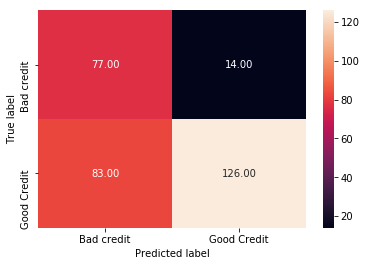

In [35]:
draw_cm( y_pred_df.actual, y_pred_df.predicted_new) 

    Now print the report with cut-off probability 0.22

In [36]:
print(metrics.classification_report( y_pred_df.actual, y_pred_df.predicted_new )) 

              precision    recall  f1-score   support

           0       0.90      0.60      0.72       209
           1       0.48      0.85      0.61        91

   micro avg       0.68      0.68      0.68       300
   macro avg       0.69      0.72      0.67       300
weighted avg       0.77      0.68      0.69       300



    With cut-off probability os 0.22, the model is able to classify the bad credits better and the F1-score for bad credit (Y=1) has also improved to 0.61

### Cost-Based Approach

    As the cost of false negatives and false positives is not same, the optimal classification cut-off probability can also be determined using cost-based approach, which finds the cut-off where the total cost is minimum. In the cost-based approach, we assign penalty cost for misclassification of positives and negatives and find the total cost for a cut-off probability. 
    
        Assuming cost of a false positive is C1 and that of a flase negative is C2, total cost will be 
        
            Total Cost = FN * C2 * FP * C1
            
    The optimal cut-off probability is the one which minimizes the total penalty cost.

In [41]:
def get_total_cost( actual, predicted, cost_FPs, cost_FNs ):
    cm = metrics.confusion_matrix(actual, predicted, [1,0])
    cm_mat = np.array( cm )
    return cm_mat[0,1] * cost_FNs + cm_mat[1,0] * cost_FPs 

In [39]:
cost_df = pd.DataFrame( columns = ['prob', 'cost']) 

    Now we can calculate the penalty cost for each cut-off probability values between 0.1 and 0.5 with incremental value of 0.01 and sort the costs in ascending order to find the cut-off probability at which the penalty cost is minimum

In [48]:
idx = 0
## iterate cut-off probability values between 0.1 and 0.5 
for each_prob in range( 10, 50):
    cost = get_total_cost( y_pred_df.actual, y_pred_df.predicted_prob.map( lambda x: 1 if x > (each_prob/100)  else 0), 1, 5 )
    cost_df.loc[idx] = [(each_prob/100), cost] 
    idx += 1 


In [49]:
cost_df.sort_values( 'cost', ascending = True )[0:5] 

,prob,cost
4,0.14,150.0
12,0.22,153.0
2,0.12,154.0
10,0.20,154.0
9,0.19,156.0


    The lowest cost is achieved at cut-off probablity of 0.14 if false negatives are assumed to be five times costlier than false positives (domain knowledge required). So, let us predict everything beyond 0.14 as bad credit and below 0.14 as good credit

In [51]:
y_pred_df['predicted_using_cost'] = y_pred_df.predicted_prob.map(lambda x: 1 if x > 0.14 else 0)

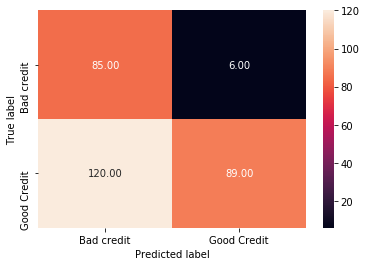

In [52]:
draw_cm( y_pred_df.actual, y_pred_df.predicted_using_cost )

    The model has reduced the false negatives to only 6. This is because of high cost false negatives(5 times) compared to false positives. The number of false positives have increased to 120.